# Spatial Autocorrelation Analysis
Via Moran's I

In [8]:
# Graphics
import matplotlib.pyplot as plt
#import seaborn
#from pysal.viz import splot
from splot.esda import plot_moran
#import contextily
# Analysis
import geopandas as gpd
import pandas as pd
from pysal.explore import esda
from pysal.lib import weights
#from numpy.random import seed

In [9]:
mymap = gpd.read_file('quake_data/Comuni2016/Com01012016_WGS84.shp',encoding='utf-8').to_crs('epsg:4326')
mymap = mymap[['COD_REG','COMUNE','geometry']]
mymap.columns = ['COD_REG','Comune','geometry']
map_reg = gpd.read_file('quake_data/Reg/Reg01012016_WGS84.shp').to_crs('epsg:4326')
map_reg = map_reg[map_reg['DEN_REG'].isin(['Marche','Lazio','Abruzzo','Umbria'])]
map_reg = map_reg[['COD_REG','DEN_REG','geometry']]
map_reg.columns = ['COD_REG','Regione','geometry']
map_reg.head()

,COD_REG,Regione,geometry
9,10,Umbria,"MULTIPOLYGON (((12.35804 43.61649, 12.35857 43..."
10,11,Marche,"POLYGON ((12.75621 43.96864, 12.75644 43.96851..."
11,12,Lazio,"MULTIPOLYGON (((12.24362 41.73787, 12.24419 41..."
12,13,Abruzzo,"MULTIPOLYGON (((14.23309 42.46541, 14.23313 42..."


In [10]:
variaz = pd.read_csv('quake_data/variaz_phone.csv', sep=',')
mapx = mymap.merge(variaz).merge(map_reg[['COD_REG','Regione']])
crat = mapx[mapx['Cratere Centro Italia 2016'] == 1]
mapx.head()

,COD_REG,Comune,geometry,Cratere Centro Italia 2016,Variaz,Regione
0,11,Ripatransone,"POLYGON ((13.79857 43.03372, 13.79856 43.03366...",0,-2.061919,Marche
1,11,Trecastelli,"POLYGON ((13.11299 43.72705, 13.11340 43.72703...",0,-1.904407,Marche
2,11,Massa Fermana,"POLYGON ((13.47962 43.16622, 13.47990 43.16615...",1,-2.134708,Marche
3,11,Monsampietro Morico,"POLYGON ((13.56050 43.08014, 13.56080 43.07984...",1,-3.335351,Marche
4,11,Servigliano,"POLYGON ((13.51740 43.08507, 13.51762 43.08429...",1,-17.060111,Marche


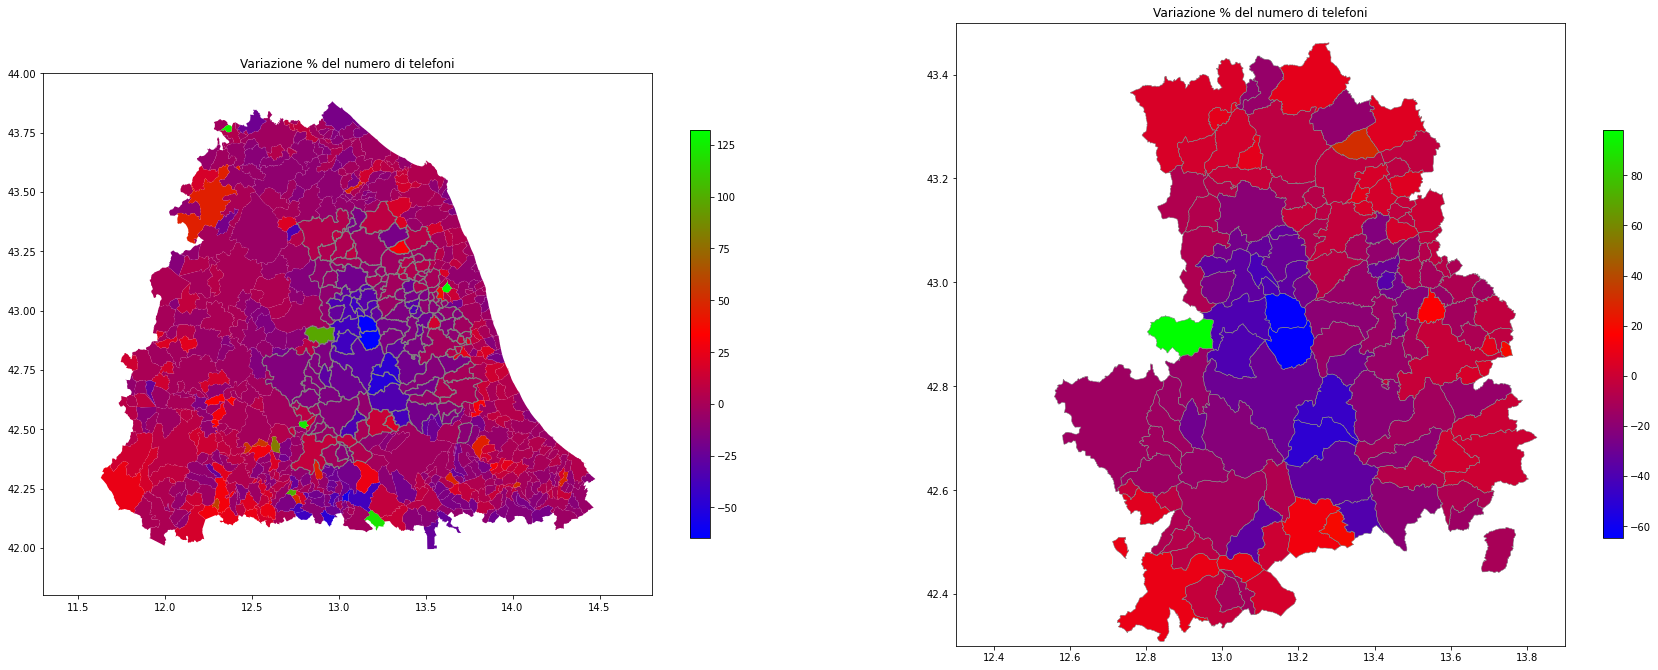

In [11]:
mapy = mapx
craty = crat
#mapy = mapx.loc[(mapx['Variaz']>-100) & (mapx['Variaz']<50),:]
#craty = crat.loc[(crat['Variaz']>-100) & (crat['Variaz']<50),:]

# https://matplotlib.org/2.0.2/users/colormaps.html
nrow=1
ncol=2
fig, axes = plt.subplots(nrow, ncol, figsize=(30,25))
ax3 = mapy.plot(column='Variaz', cmap = 'brg', legend= True, legend_kwds={'shrink': 0.3}, ax=axes[0])
crat.plot(ax=ax3, color='none', edgecolor='grey', linewidths=1)
ax3.set_ylim(41.8,44)
ax3.set_xlim(11.3,14.8)
ax3.title.set_text('Variazione % del numero di telefoni')

ax3 = craty.plot(column='Variaz', cmap = 'brg', legend= True, legend_kwds={'shrink': 0.3}, ax=axes[1])
crat.plot(ax=ax3, color='none', edgecolor='grey', linewidths=0.5)
ax3.set_ylim(42.3,43.5)
ax3.set_xlim(12.3,13.9)   
ax3.title.set_text('Variazione % del numero di telefoni')

0.09481570807460138 0.001


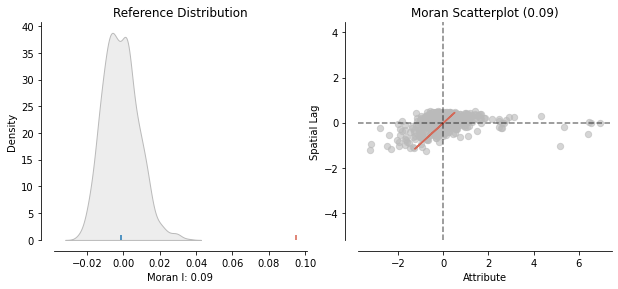

In [13]:

m = mapy

# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(m, k=30)
#w = weights.distance.Kernel.from_dataframe(mapx)
# Row-standardization
w.transform = 'R'
moran = esda.moran.Moran(m['Variaz'], w)
plot_moran(moran);
plt.savefig('images/moran.pdf',bbox_inches='tight')  
print(moran.I,moran.p_sim)

In [14]:
moran.I

0.09481570807460138

In [15]:
moran.p_sim

0.001

In [16]:
df = pd.read_csv('sisma2016_data/Ricostruzione Privata.CSV',sep=';',na_values=['-'])
df = df.drop(['PROVINCIA','DOMANDE / EDIFICI INAGIBILI DL.1','DOMANDE / EDIFICI INAGIBILI DL'],axis='columns')
df = df.fillna(0)
df['DOMANDE DL / DL'] = df['DOMANDE DL'] / df['DL']
df['DOMANDE DG / DG'] = df['DOMANDE DG'] / df['DG']
df.columns = ['Comune','SMALL DAMAGE REQ.', 'GREAT DAMAGE REQ.', 'TOT REQ.','ACCEPTED REQ.',
              'BUILDING STARTED', 'BUILIDING CONCLUDED','SMALL DAMAGE','GREAT DAMAGE',
              'SMALL DAMAGE REQ/ACTUAL','GREAT DAMAGE REQ/ACTUAL']
df['TOT. DAMAGE'] = df['SMALL DAMAGE'] + df['GREAT DAMAGE']
df1 = pd.read_csv('sisma2016_data/Sintesi della Ricostruzione nel Territorio.CSV',sep=';',na_values=['-'])
df1 = df1.drop(['PR','Tecnici','Amministrativi','Altro','Totale '],axis='columns')
df1 = df1.fillna(0)
df1['RCR Presentate VS Attese -tasso di copertura- (%) '] = df1['RCR Presentate '] / df1['RCR Attese ']
df1.columns = ['Comune','RCR FORECAST','RCR ACTUAL','RCR FORECAST / ACTUAL','OOPP']
df1 = df1.merge(df)
df1.head(2)

,Comune,RCR FORECAST,RCR ACTUAL,RCR FORECAST / ACTUAL,OOPP,SMALL DAMAGE REQ.,GREAT DAMAGE REQ.,TOT REQ.,ACCEPTED REQ.,BUILDING STARTED,BUILIDING CONCLUDED,SMALL DAMAGE,GREAT DAMAGE,SMALL DAMAGE REQ/ACTUAL,GREAT DAMAGE REQ/ACTUAL,TOT. DAMAGE
0,Acquasanta Terme,1295,271.0,0.209266,2,226,124.0,350,175.0,175.0,98.0,465.0,834.0,0.486022,0.148681,1299.0
1,Amandola,936,123.0,0.131410,5,140,53.0,193,85.0,85.0,32.0,350.0,596.0,0.400000,0.088926,946.0


0.04 (0.018)


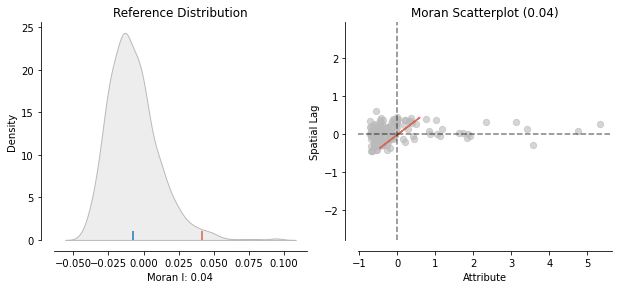

In [18]:
m = mymap.merge(df1).merge(map_reg[['COD_REG','Regione']])
# Generate W from the GeoDataFrame
w = weights.KNN.from_dataframe(m, k=30)
#w = weights.distance.Kernel.from_dataframe(mapx)
# Row-standardization
w.transform = 'R'
moran = esda.moran.Moran(m['RCR ACTUAL'], w)
plot_moran(moran);
print(f'{round(moran.I,2)} ({moran.p_sim})')